In [1]:
# IMport pandas
import pandas as pd
import matplotlib.pyplot as plt
import operator
import warnings

warnings.filterwarnings("ignore")

In [2]:
# load data
data = pd.read_csv('data-police-shootings/data.csv')

In [3]:
# Create a count column for the data
data['count'] = 1

# Black Lives Matter Data Analysis
As a conservative with centrist view points, I hear pieces of information from both sides constantly - and honestly I don't know what to believe anymore since it's as clear cut as one might think. With a degree in datascience I am in unique position to find out the truth for myself, and thats exactly what I did. The questions I wanted to answer is:

- How many black people where really killed since 2015 and whats the average
- Was there justifiable cause to kill the person
- Are black people over represented in police shootings
- Do republican or democratic police shoot more black people 

Data Sources:

Washington Post: People Shot By Police (https://github.com/washingtonpost/data-police-shootings)<br>
Violent Crime Victimization, Bureau of justice (https://www.bjs.gov/content/pub/pdf/cv18.pdf - Table 12)[Only used in Q3 and its stated when its used]


# How many black people where really killed since 2015 and whats the average

In [4]:
# Total
print("Total Killed By Police: ", data.shape[0])
print("Total Black People Killed By Police: ", data[data['race'] == 'B'].shape[0])
print("Average Killed by year (5.5 years thus far): ", round(data[data['race'] == 'B'].shape[0] / 5.5), " rounded")

Total Killed By Police:  5399
Total Black People Killed By Police:  1292
Average Killed by year (5.5 years thus far):  235  rounded


### Answer
This was a fairly easy question to answer. Roughly 235 per year. With a total population of 328.2 million (2019) that is: 0.000098% of the total population.

In [5]:
235 / (238.2 * 1000000) * 100

9.865659109991603e-05

# Was there justifiable cause to kill the person

In [6]:
# Get the data
black_data = data[data['race'] == 'B']
black_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,count
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,1
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False,1
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False,1
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True,1
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5381,5879,Jarvis Sullivan,2020-05-29,shot,vehicle,44.0,M,B,Yulee,FL,False,other,Car,False,1
5382,5863,Derrick Thompson,2020-05-30,shot,gun,46.0,M,B,Fountain,FL,False,attack,Not fleeing,False,1
5385,5842,David McAtee,2020-06-01,shot,gun,53.0,M,B,Louisville,KY,False,attack,NaN,True,1
5390,5897,Tyquarn Graves,2020-06-02,shot,gun,33.0,M,B,Brooklyn,NY,False,attack,Not fleeing,True,1


So Justifiable and not is a very vague category and since I was not there, there is no way I can put it in a clear cut category. So I will break it into more categories and assign attributes of the group as identifiers.

Text(0.5, 1.0, 'Types of wepons')

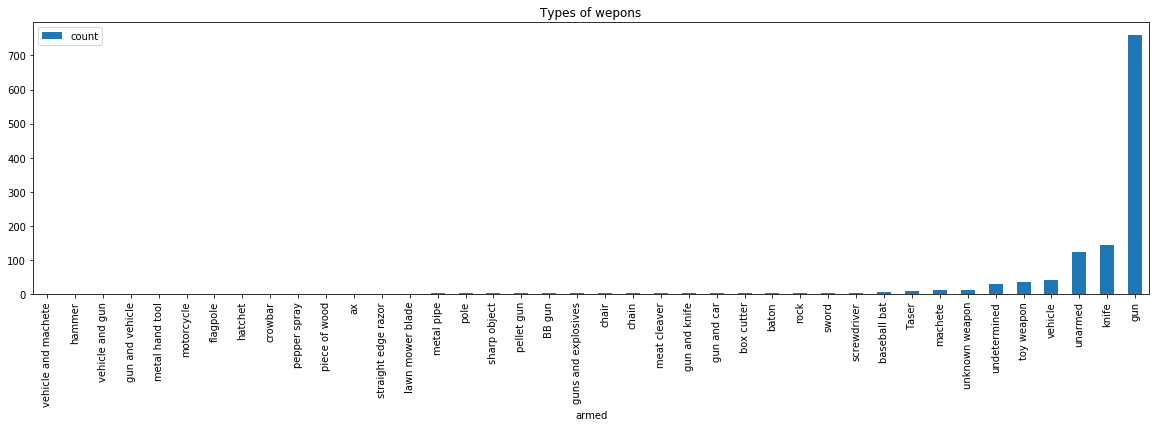

In [7]:
# First lets have a look at the armed breakdown

armed_data = black_data[['armed', 'count']].groupby(['armed']).sum().sort_values(by=['count'])

armed_data.plot.bar(figsize=(20,5))
plt.title('Types of wepons')

The majoriy had guns, more than 700. However, that doesn't mean they used it. We can say that the number of unarmed individuals, regardless of weather they attacked the police or not were unjustly killed, as the police should have tasers and training to overcome unarmed individuals.

In [8]:
unjustly_killed = 0

In [9]:
# Group it by weather they were armed
armed = black_data[black_data['armed'] != 'unarmed']
unared = black_data[black_data['armed'] == 'unarmed']

In [26]:
print(armed.shape[0])
print(unared.shape[0])

1169
123


In [10]:
unjustly_killed = unjustly_killed + unared.shape[0]

Now count the number of armed individuals which didn't attack or point the gun at the police

In [35]:
attacked_police = black_data[black_data['threat_level'] == 'attack']
attacked_police['count'].sum() / black_data['count'].sum()

0.6726006191950464

In [37]:
attacked_police = black_data[black_data['threat_level'] == 'attack']
attacked_police_B = attacked_police[attacked_police['body_camera'] == True]
attacked_police_B['count'].sum() / attacked_police['count'].sum()

0.13578826237054084

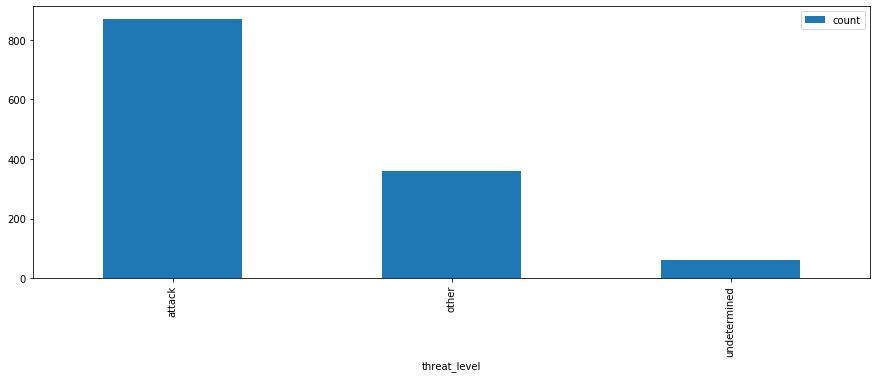

In [34]:
black_data[['threat_level', 'count']].groupby('threat_level').sum().plot.bar(figsize=(15,5))

That is a staggering amount - up to 300+ people where shot without making threatening gestures or first attacking the police.

# Are blacks over represented in police shootings

Text(0.5, 1.0, 'Percentage Breakdown of people killed by cops since 2015')

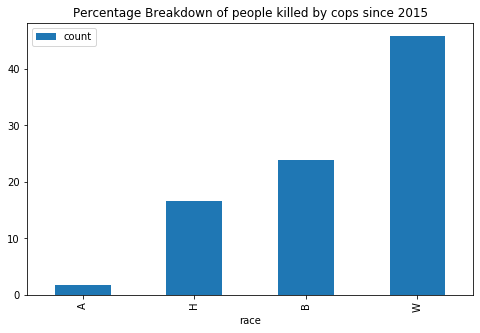

In [40]:
race_breakdown = data[['race', 'count']].groupby('race').sum().sort_values(by=['count']) / data['count'].sum() * 100
race_breakdown['race'] = race_breakdown.index.values
race_breakdown_final = race_breakdown[['race', 'count']]
race_breakdown_final = race_breakdown_final[race_breakdown_final['race'] != 'O']
race_breakdown_final = race_breakdown_final[race_breakdown_final['race'] != 'N']

race_breakdown_final.plot.bar(figsize=(8,5))
plt.title('Percentage Breakdown of people killed by cops since 2015')

In [42]:
race_breakdown.T

race,O,N,A,H,B,W
count,0.889054,1.44471,1.72254,16.6698,23.9304,45.8233
race,O,N,A,H,B,W


Text(0.5, 1.0, 'Percentage of population in 2019')

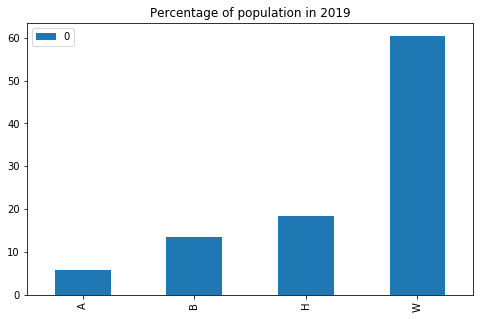

In [48]:
d = {'W':60.4, 'B':13.4, 'H':18.3, 'A':5.9, 'O': 0.2}
a  = dict(sorted(d.items(), key=operator.itemgetter(1)))
race_pop = pd.DataFrame.from_dict(a, orient='index')
race_pop['race'] = race_pop.index.values
race_pop_final = race_pop[race_pop['race'] != 'O']
race_pop_final.plot.bar(figsize=(8,5))
plt.title('Percentage of population in 2019')


In [47]:
race_pop.T

,O,A,B,H,W
0,0.2,5.9,13.4,18.3,60.4
race,O,A,B,H,W


In [15]:
# Ratios
w_bd_2019 = race_breakdown_final[race_breakdown_final['race'] == 'W']['count'][0]
w_pop_2019 = race_pop[race_pop['race'] == 'W'][0][0]
w_ratio_2019 = w_bd_2019 / w_pop_2019

b_bd_2019 = race_breakdown_final[race_breakdown_final['race'] == 'B']['count'][0]
b_pop_2019 = race_pop[race_pop['race'] == 'B'][0][0]
b_ratio_2019 = b_bd_2019 / b_pop_2019

h_bd_2019 = race_breakdown_final[race_breakdown_final['race'] == 'H']['count'][0]
h_pop_2019 = race_pop[race_pop['race'] == 'H'][0][0]
h_ratio_2019 = h_bd_2019 / h_pop_2019

a_bd_2019 = race_breakdown_final[race_breakdown_final['race'] == 'A']['count'][0]
a_pop_2019 = race_pop[race_pop['race'] == 'A'][0][0]
a_ratio_2019 = a_bd_2019 / a_pop_2019

print("% Killed by Police vs Population")
print ("2019, white ratio: ", round(w_ratio_2019, 2))
print ("2019, black ratio: ", round(b_ratio_2019, 2))
print ("2019, hispanic ratio: ", round(h_ratio_2019, 2))
print ("2019, asian ratio: ", round(a_ratio_2019, 2))


% Killed by Police vs Population
2019, white ratio:  0.76
2019, black ratio:  1.79
2019, hispanic ratio:  0.91
2019, asian ratio:  0.29


## Answer
At first glance it seems YES there is a clear devide. Blacks are definitely over represented. However, this is just result and not cause. Further we will need to look at how likely each race is to commit a crime.

For this we will use the 2018 report of criminal victimization of violent crimes from the beuru of justice (https://www.bjs.gov/content/pub/pdf/cv18.pdf - Table 12). 2019 report has not yet been released. We will use the % of violent crimes and the also % of population to get a <b>ratio</b> which will be compared to the ratios in the first part

,A,H,B,W
0,2.5,14.4,21.7,50.2


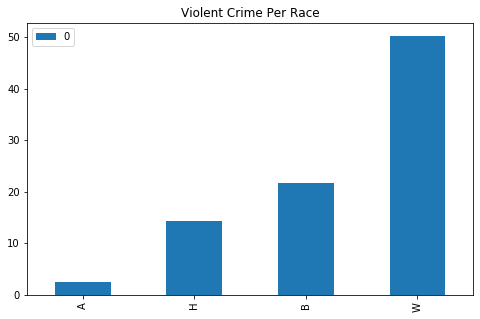

In [60]:
# Note that values don't add up precisely due to rounding errors but very close
violent_crime_per_race = {'W':50.2, 'B':21.7, 'H':14.4, 'A':2.5 }
a  = dict(sorted(violent_crime_per_race.items(), key=operator.itemgetter(1)))
vcpr_df = pd.DataFrame.from_dict(a, orient='index')
vcpr_df.plot.bar(figsize=(8,5))
plt.title("Violent Crime Per Race")

vcpr_df.T


,A,B,H,W
0,6.3,12.2,17.1,62.3


<Figure size 432x288 with 0 Axes>

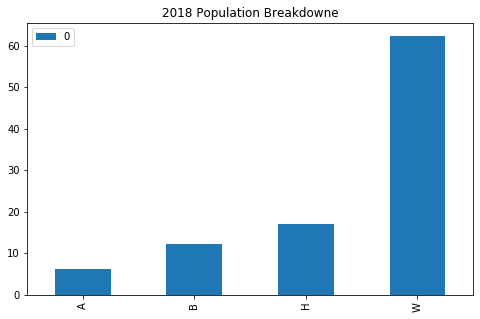

In [59]:
plt.figure()
population_break_down = {'W':62.3, 'B':12.2, 'H':17.1, 'A':6.3 }
a  = dict(sorted(population_break_down.items(), key=operator.itemgetter(1)))
pbd_df = pd.DataFrame.from_dict(a, orient='index')

pbd_df.plot.bar(figsize=(8,5))
plt.title("2018 Population Breakdowne")
pbd_df.T

In [61]:
# Now lets calculate the ratios
w_ratio_2018 = violent_crime_per_race['W'] / population_break_down['W']
b_ratio_2018 = violent_crime_per_race['B'] / population_break_down['B']
h_ratio_2018 = violent_crime_per_race['H'] / population_break_down['H']
a_ratio_2018 = violent_crime_per_race['A'] / population_break_down['A']

print("% of Violent Crimes Commited vs Population")
print ("2018, white ratio: ", round(w_ratio_2018, 2))
print ("2018, black ratio: ", round(b_ratio_2018, 2))
print ("2018, hispanic ratio: ", round(h_ratio_2018, 2))
print ("2018, asian ratio: ", round(a_ratio_2018, 2))

% of Violent Crimes Commited vs Population
2018, white ratio:  0.81
2018, black ratio:  1.78
2018, hispanic ratio:  0.84
2018, asian ratio:  0.4


### Now lets comare the rations
Below we will take the % Crimes commited - % Police Killings. The ideal number is 0. That would mean the ethnicity has no bias against it.

In [67]:
totals = {'W': w_ratio_2018 - w_ratio_2019, 
          'B': b_ratio_2018 - b_ratio_2019, 
          'H': h_ratio_2018 - h_ratio_2019,
          'A': a_ratio_2018 - a_ratio_2019}

a  = dict(sorted(totals.items(), key=operator.itemgetter(1)))
a_df = pd.DataFrame.from_dict(a, orient='index')
a_df.T


,H,B,W,A
0,-0.06881,-0.007159,0.047115,0.104869


Text(0.5, 1.0, 'Oppressed vs Priviledge Normalized')

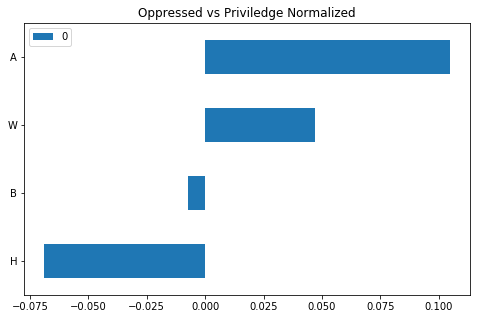

In [73]:
# Lets see which ethnicity has the most bias for/against it
a_df.plot.barh(figsize=(8,5))
plt.title('Oppressed vs Priviledge Normalized')

Text(0.5, 1.0, 'Absolute Map')

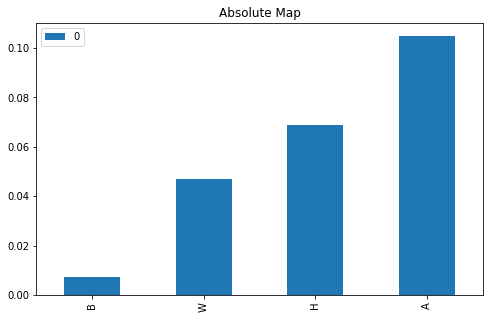

In [63]:
# lets just check who has he most fair
a_df[0] = abs(a_df[0])
a_df.sort_values(by=[0]).plot.bar(figsize=(8,5))
plt.title('Absolute Map')

### Answer
Yes technically there is a devide. However, black people are the most balanced race in terms of the number of violent crimes commited vs number shot dead by police.  From the graphs above we can see:

* The number of blacks killed is very proportionate to the number of violent crimes commited. Making them neither over or under represented.
* Whites are next on the fairness ranking but on the possitive side. Whites are definitely under represented. And yes this does show a bias towards white people, meaning that.
* Third on the fairness ranking is the hispanic/latino community. This was a shock to me, but the latino community is actually the least priveledged race in this study. They are much more likely to be shot by the police relative the number of violent crimes they commit.
* Lastly, Asians are the most priveldged race when it comes to the number of violent crimes they commit.


# Is the most black people killed in Democratic states

Text(0.5, 1.0, 'Blacks Killed By State')

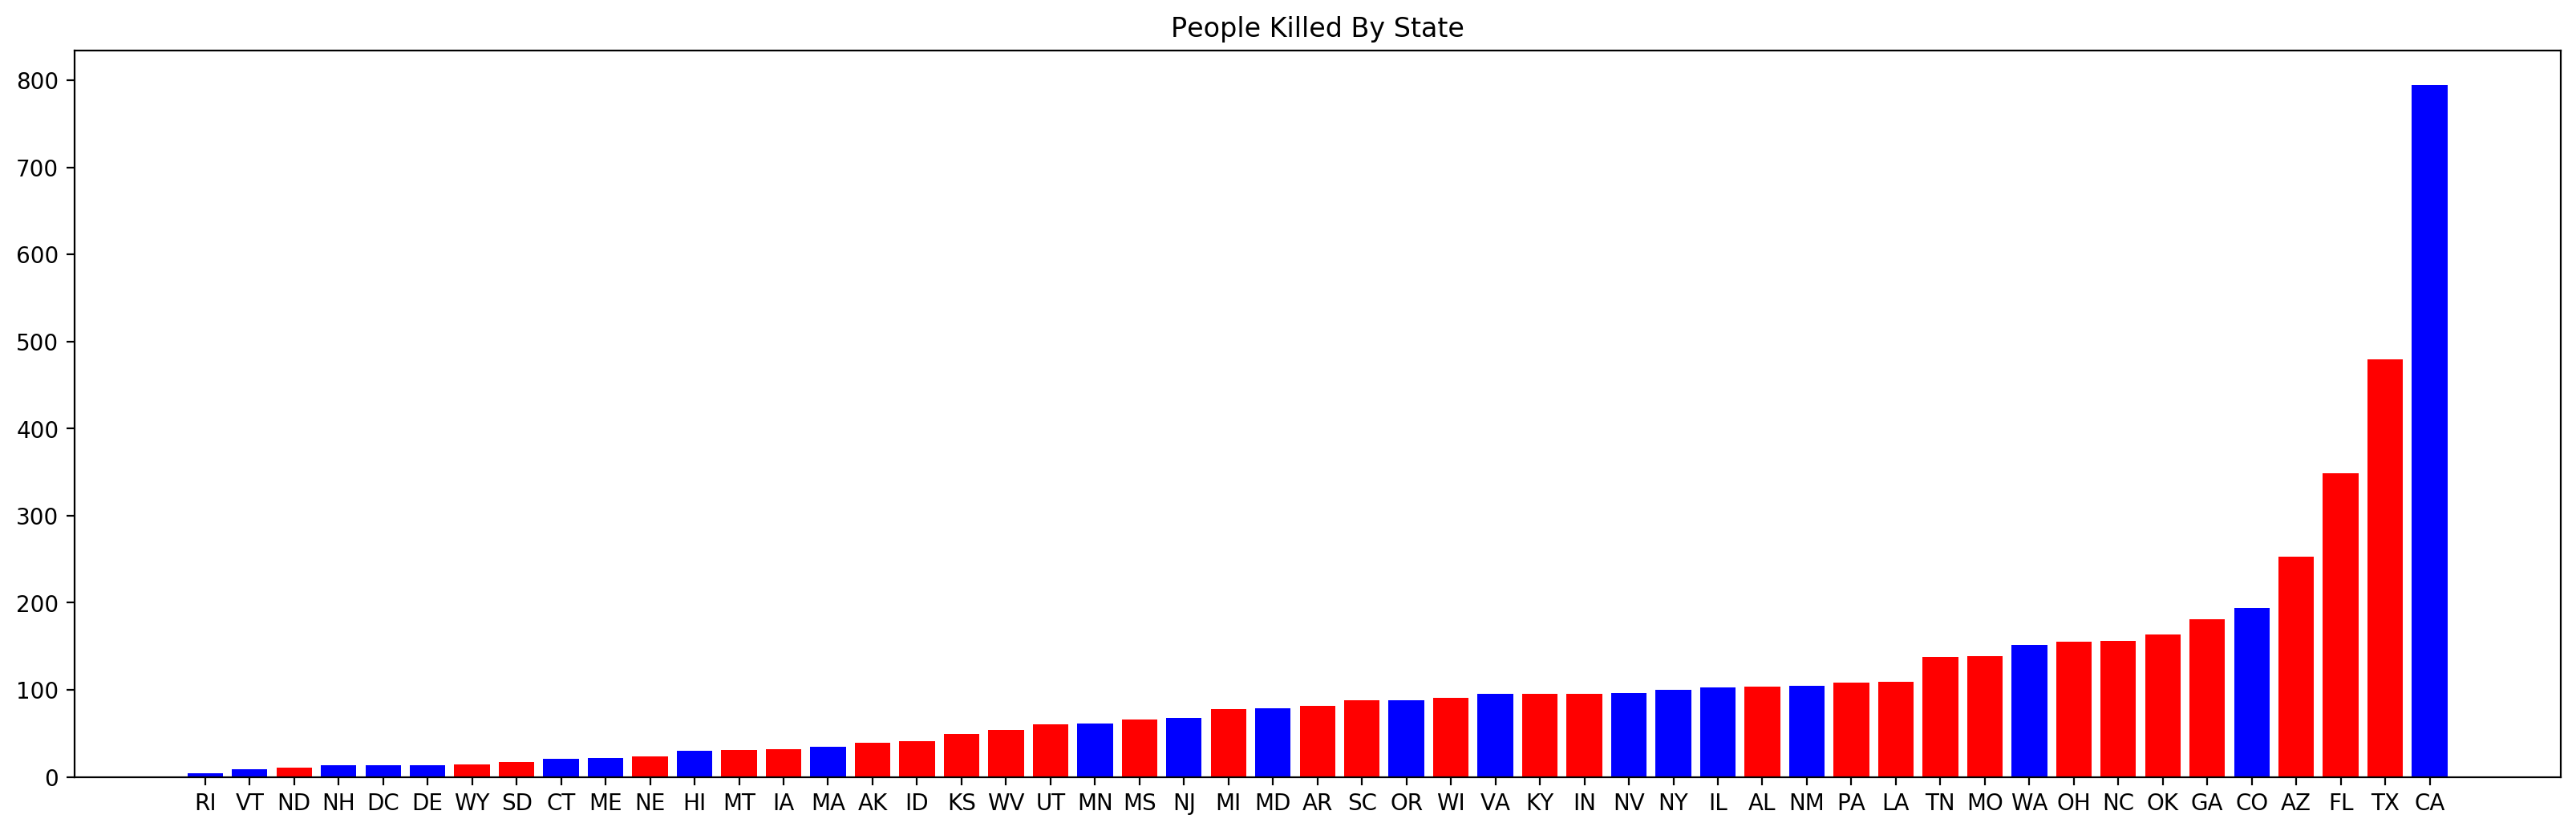

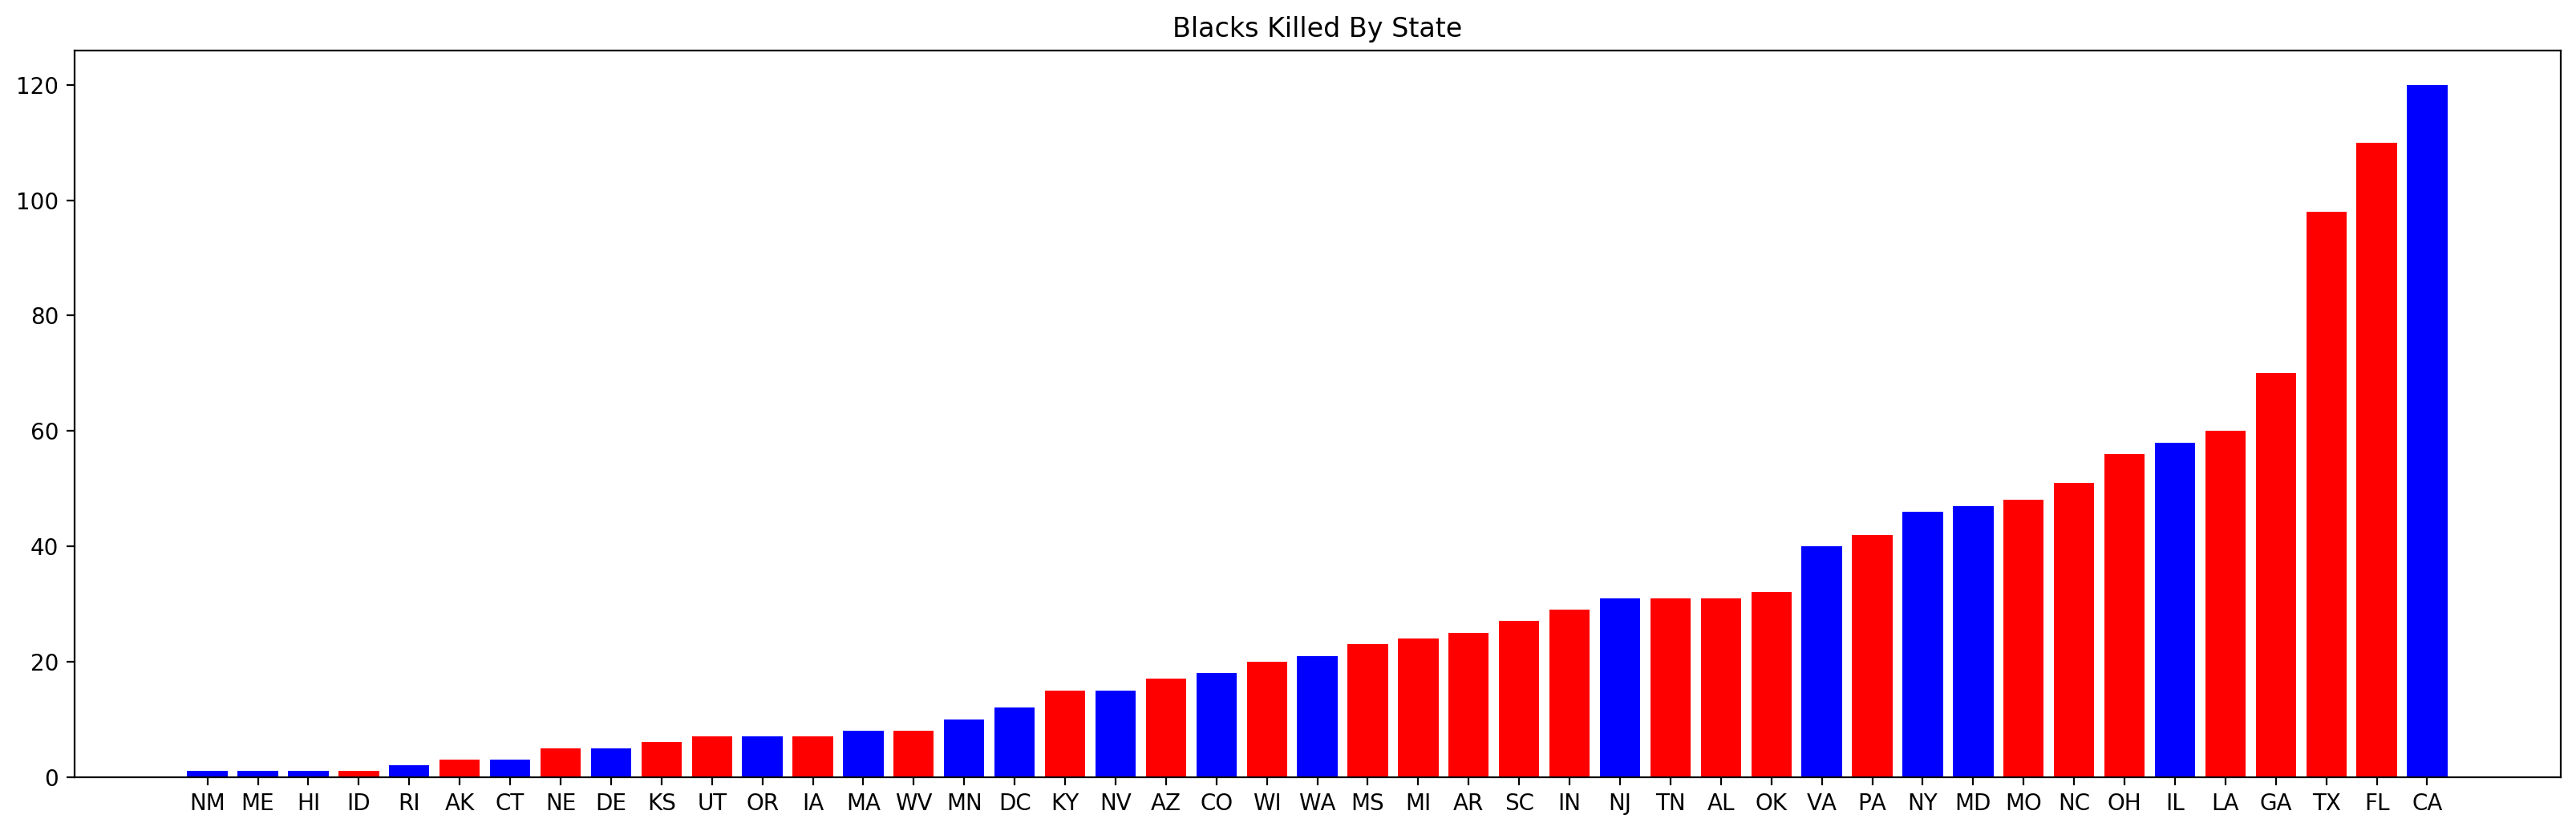

In [21]:
# Blue states
blue_states = ['WA', 'OR','NV','CA','CO','NM','MN','IL','VA','NY','VT','NH', 'ME','MA','RI','CT','NJ','DE','MD','DC','HI']

def getState(states, value):
    if value in states:
        return 'b'
    else:
        return 'r'
    
# Devision
shootings_per_state = data[['state', 'count']].groupby('state').sum().sort_values(by=['count'])
shootings_per_state['state'] = shootings_per_state.index.values
shootings_per_state['color'] =  'r'

for i, row in shootings_per_state.iterrows():
    shootings_per_state['color'][i] = getState(blue_states, i)

cols = shootings_per_state['color'].tolist()


plt.figure(num=None, figsize=(20, 6), dpi=200, facecolor='w', edgecolor='k')
plt.bar(shootings_per_state['state'], shootings_per_state['count'], color = cols)

plt.title("People Killed By State")

# Devision
black_data = data[data['race'] == 'B']
b_shootings_per_state = black_data[['state', 'count']].groupby('state').sum().sort_values(by=['count'])
b_shootings_per_state['state'] = b_shootings_per_state.index.values
b_shootings_per_state['color'] =  'r'

for i, row in b_shootings_per_state.iterrows():
    b_shootings_per_state['color'][i] = getState(blue_states, i)

cols = b_shootings_per_state['color'].tolist()

plt.figure(num=None, figsize=(20, 6), dpi=200, facecolor='w', edgecolor='k')
plt.bar(b_shootings_per_state['state'], b_shootings_per_state['count'], color = cols)
plt.title("Blacks Killed By State")


### Blacks Killed By State

In [22]:
red_states = shootings_per_state[shootings_per_state['color'] == 'r']
blue_states = shootings_per_state[shootings_per_state['color'] == 'b']

print("Red States (all): ", red_states['count'].sum())
print("Blye States (all): ", blue_states['count'].sum())

red_states = b_shootings_per_state[b_shootings_per_state['color'] == 'r']
blue_states = b_shootings_per_state[b_shootings_per_state['color'] == 'b']

print("Red States (black): ", red_states['count'].sum())
print("Blye States (black): ", blue_states['count'].sum())

Red States (all):  3303
Blye States (all):  2096
Red States (black):  846
Blye States (black):  446


## Answer:
Yes, California definitely has the most blacks killed by polices, the most combined as well, however, acros all the states the total sum of Democratic states is almost 50% of the Rebublican states
